In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

#waveform
#fft -> spectrum
#stft -> spectrogram
#MFCCs

(661794,)


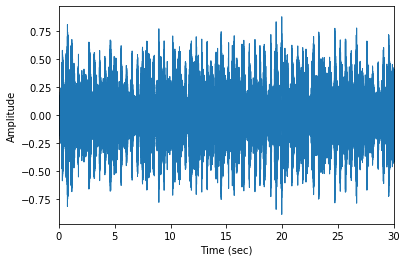

In [15]:
#waveform
file = "blues.00000.wav"
signal, sr = librosa.load(file, sr=22050)  #sr * duration = 22050 * 30sec
print(signal.shape)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()

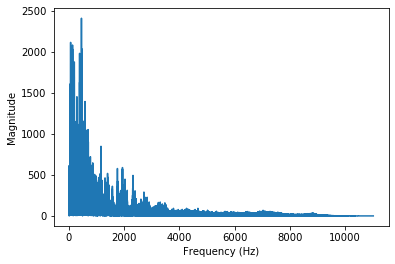

In [14]:
#fft -> power spectrum
#static snapshot of the whole sound
import numpy as np
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency) / 2)]
left_magnitude = magnitude[:int(len(magnitude) / 2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

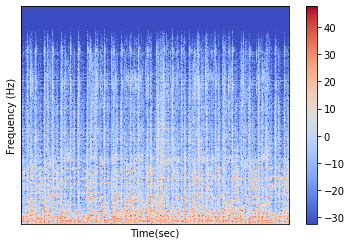

In [18]:
#short time fourier transform -> spectrogram
#to see how each frequency contribute throughout the whole data
#number of samples per fft
#the window width that we are considering while performing a single fft
n_fft = 2048
#the amount that we are shifting each window to the right
hop_length = int(n_fft / 4)

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time(sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()
plt.show()

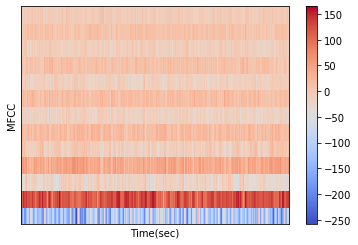

In [19]:
#MFCCs
MFCCs = librosa.feature.mfcc(signal,
                             n_fft=n_fft,
                             hop_length=hop_length,
                             n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time(sec)")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()